# This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Exploring data for regression analysis.
4. Regression analysis
5. Performance improvement after removing outliers


# 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\irikh\iCloudDrive\Data analytics\COURSE DATA ANALYTIC\COURSE DATA IMMERG\A6'

In [4]:
# Import data

citi = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'c_warngled3.csv'), index_col = False)

# 2. Data cleaning

In [5]:
citi.head()

,Unnamed: 0.1,Unnamed: 0,bike_id,day_of_week,start_hour,ride_start,ride_start.1,ride_start.2,start_station_id,start_station_name,...,start_station_longitude,ride_end,end_station_id,end_station_name,end_station_latitude,end_station_longitude,birth_year,trip_duration_min,Trip category,Birth category
0,0,0,16013,Mon,18,2013/09/09 18:18,2013-09-09,18:18:00,523,W 38 St & 8 Ave,...,-73.991382,2013/09/09 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,1968,16,15-20 minutes,45-54
1,1,1,15230,Thu,18,2013/09/12 18:38,2013-09-12,18:38:00,257,Lispenard St & Broadway,...,-74.002472,2013/09/12 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,1983,9,5-10 minutes,25-34
2,2,2,17942,Wed,19,2013/09/18 19:44,2013-09-18,19:44:00,479,9 Ave & W 45 St,...,-73.991255,2013/09/18 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,1989,6,5-10 minutes,18-24
3,3,3,19683,Sat,11,2013/09/28 11:54,2013-09-28,11:54:00,527,E 33 St & 1 Ave,...,-73.974347,2013/09/28 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,1988,9,5-10 minutes,25-34
4,4,4,14581,Fri,22,2013/09/27 22:01,2013-09-27,22:01:00,293,Lafayette St & E 8 St,...,-73.990765,2013/09/27 22:08,432,E 7 St & Avenue A,40.726218,-73.983799,1986,7,5-10 minutes,25-34


In [6]:
# Dropping unnecessary columns
citi_1 = citi.drop(columns = ['Unnamed: 0.1', "Unnamed: 0",])

In [7]:
# Rename columns 
citi_1.rename(columns = {'ride_start.1' : 'ride_start_date'}, inplace = True)                             

In [8]:
# Rename columns 
citi_1.rename(columns = {'ride_start.2' : 'ride_start_time'}, inplace = True)      

In [9]:
citi_1.dtypes

bike_id                      int64
day_of_week                 object
start_hour                   int64
ride_start                  object
ride_start_date             object
ride_start_time             object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
ride_end                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
birth_year                   int64
trip_duration_min            int64
Trip category               object
Birth category              object
dtype: object

In [10]:
citi_1['ride_start'] = pd.to_datetime(citi_1['ride_start'])

In [11]:
citi_1['ride_start_date'] = pd.to_datetime(citi_1['ride_start_date'])

In [14]:
citi_1['ride_start_time'] = pd.to_datetime(citi_1['ride_start_time'])

In [15]:
citi_1['ride_end'] = pd.to_datetime(citi_1['ride_end'])

In [16]:
citi_1.dtypes

bike_id                             int64
day_of_week                        object
start_hour                          int64
ride_start                 datetime64[ns]
ride_start_date            datetime64[ns]
ride_start_time            datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
ride_end                   datetime64[ns]
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
birth_year                          int64
trip_duration_min                   int64
Trip category                      object
Birth category                     object
dtype: object

In [17]:
# Export dataset 
citi_1.to_csv(os.path.join(path, '02 Data','Prepared Data', 'c_wrangled4.csv'))

# 3. Exploring for regression analysis

In [17]:
#getting rid of un needed columns
citi_1=citi_1[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration_min',
      'birth_year', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time', "Birth category"]]

In [18]:
citi_1

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration_min,birth_year,ride_start,ride_end,Trip category,ride_start_date,ride_start_time,Birth category
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,16,1968,2013-09-09 18:18:00,2013-09-09 18:35:00,10-20 minutes,2013-09-09,2023-12-07 18:18:00,31-50
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,9,1983,2013-09-12 18:38:00,2013-09-12 18:48:00,under 10 minutes,2013-09-12,2023-12-07 18:38:00,31-50
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,6,1989,2013-09-18 19:44:00,2013-09-18 19:50:00,under 10 minutes,2013-09-18,2023-12-07 19:44:00,18-30
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,9,1988,2013-09-28 11:54:00,2013-09-28 12:03:00,under 10 minutes,2013-09-28,2023-12-07 11:54:00,18-30
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,7,1986,2013-09-27 22:01:00,2013-09-27 22:08:00,under 10 minutes,2013-09-27,2023-12-07 22:01:00,18-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42985,Sat,15,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,40.756604,-73.997901,16,1973,2013-09-28 15:30:00,2013-09-28 15:46:00,10-20 minutes,2013-09-28,2023-12-07 15:30:00,31-50
42986,Sun,16,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,40.722174,-73.983688,25,1975,2013-09-01 16:27:00,2013-09-01 16:52:00,over 20 minutes,2013-09-01,2023-12-07 16:27:00,31-50
42987,Sat,17,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,40.721816,-73.997203,19,1970,2013-09-14 17:32:00,2013-09-14 17:52:00,10-20 minutes,2013-09-14,2023-12-07 17:32:00,31-50
42988,Sat,18,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,40.755273,-73.983169,17,1961,2013-09-07 18:08:00,2013-09-07 18:25:00,10-20 minutes,2013-09-07,2023-12-07 18:08:00,51-70


In [19]:
citi_1.describe()

,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration_min,birth_year,ride_start,ride_end,ride_start_date,ride_start_time
count,42990.000000,42990.000000,42990.000000,42990.000000,42990.000000,42990.000000,42990.000000,42990.000000,42990.000000,42990,42990,42990,42990
mean,14.085229,437.214910,40.734477,-73.990949,434.588090,40.734071,-73.991242,12.346197,1975.677902,2013-09-16 18:03:40.240055808,2013-09-16 18:17:13.536636416,2013-09-16 03:28:54.933705728,2023-12-07 14:34:45.306350336
min,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,1.000000,1932.000000,2013-09-01 00:00:00,2013-09-01 00:07:00,2013-09-01 00:00:00,2023-12-07 00:00:00
25%,10.000000,304.000000,40.721101,-74.000040,305.000000,40.720828,-74.000271,6.000000,1968.000000,2013-09-09 17:17:15,2013-09-09 17:34:00,2013-09-09 00:00:00,2023-12-07 10:31:00
50%,15.000000,402.000000,40.736245,-73.990765,402.000000,40.735877,-73.990985,10.000000,1978.000000,2013-09-17 06:39:00,2013-09-17 06:44:00,2013-09-17 00:00:00,2023-12-07 15:21:00
75%,18.000000,485.000000,40.749718,-73.981948,483.000000,40.749013,-73.982578,16.000000,1984.000000,2013-09-24 07:38:00,2013-09-24 07:51:45,2013-09-24 00:00:00,2023-12-07 18:22:00
max,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,44.000000,1997.000000,2013-09-30 23:58:00,2013-10-01 00:15:00,2013-09-30 00:00:00,2023-12-07 23:59:00
std,4.932949,340.857456,0.019598,0.012367,332.809462,0.019603,0.012376,8.710722,10.931335,NaN,NaN,NaN,NaN


In [21]:
# Amount of rides taken on each hour of each day
hour_counts = citi_1.groupby(['start_hour',citi_1['ride_start_date'].dt.date])['ride_start_date'].count()

In [22]:
hour_counts

start_hour  ride_start_date
0           2013-09-01         15
            2013-09-02         15
            2013-09-03          5
            2013-09-04          9
            2013-09-05         13
                               ..
23          2013-09-26         38
            2013-09-27         44
            2013-09-28         48
            2013-09-29         21
            2013-09-30         17
Name: ride_start_date, Length: 711, dtype: int64

In [23]:
# Average rides per hour
avg_rides_per_hour = hour_counts.groupby('start_hour').mean().reset_index()

In [24]:
avg_rides_per_hour

,start_hour,ride_start_date
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.000000
8,8,104.233333
9,9,86.600000


In [25]:
# Rides per day 
day_counts = citi_1.groupby('day_of_week')['ride_start_date'].count()

In [26]:
day_counts

day_of_week
Fri    6594
Mon    6797
Sat    4964
Sun    5505
Thu    6212
Tue    6429
Wed    6489
Name: ride_start_date, dtype: int64

In [27]:
# Rides per hour on each day of the week
day_hour_counts = citi_1.groupby([ 'day_of_week','start_hour'])['ride_start_date'].count()

In [28]:
day_hour_counts

day_of_week  start_hour
Fri          0              48
             1              36
             2              23
             3              10
             4              10
                          ... 
Wed          19            479
             20            297
             21            213
             22            188
             23            103
Name: ride_start_date, Length: 168, dtype: int64

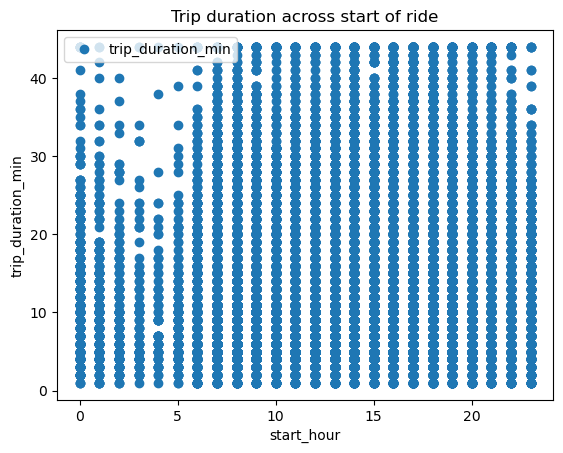

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

citi_1.plot(x = 'start_hour', y='trip_duration_min',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Trip duration across start of ride')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration_min')  
plt.show()

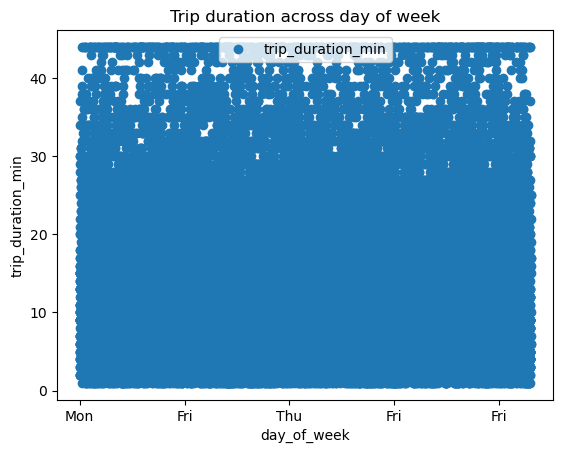

In [30]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

citi_1.plot(x = 'day_of_week', y='trip_duration_min',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Trip duration across day of week')  
plt.xlabel('day_of_week')  
plt.ylabel('trip_duration_min')  
plt.show()

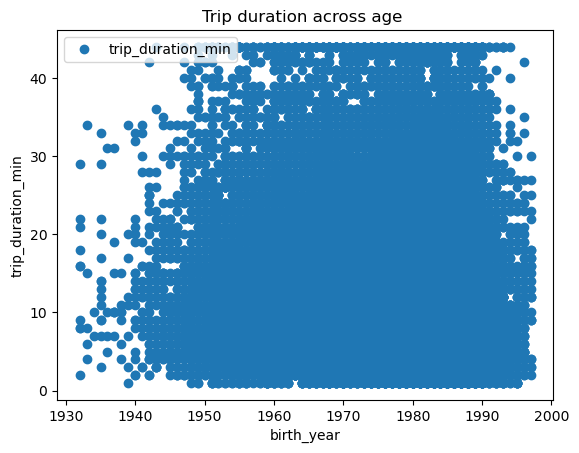

In [31]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

citi_1.plot(x = 'birth_year', y='trip_duration_min',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Trip duration across age ')  
plt.xlabel("birth_year")  
plt.ylabel('trip_duration_min')  
plt.show()

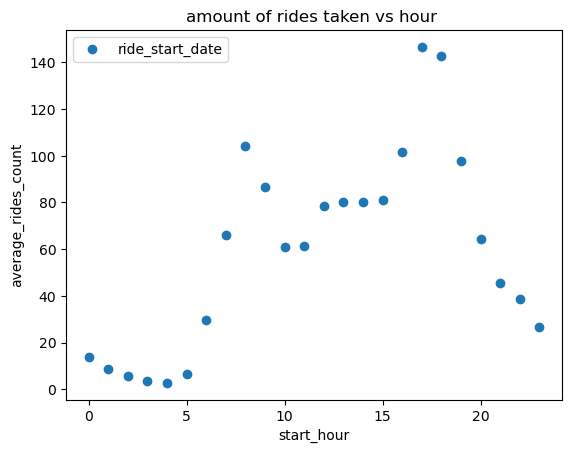

In [32]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

avg_rides_per_hour.plot(x = 'start_hour', y='ride_start_date',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('average_rides_count')  
plt.show()

In [33]:
avg_rides_per_hour

,start_hour,ride_start_date
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.000000
8,8,104.233333
9,9,86.600000


In [34]:
citi_1.columns

Index(['day_of_week', 'start_hour', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration_min', 'birth_year', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time',
       'Birth category'],
      dtype='object')

In [35]:
ride_counts = pd.get_dummies(citi_1, columns=['day_of_week', 'start_hour'], drop_first=True)

In [36]:
ride_counts

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration_min,birth_year,...,start_hour_14,start_hour_15,start_hour_16,start_hour_17,start_hour_18,start_hour_19,start_hour_20,start_hour_21,start_hour_22,start_hour_23
0,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,16,1968,...,False,False,False,False,True,False,False,False,False,False
1,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,9,1983,...,False,False,False,False,True,False,False,False,False,False
2,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,6,1989,...,False,False,False,False,False,True,False,False,False,False
3,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,9,1988,...,False,False,False,False,False,False,False,False,False,False
4,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,7,1986,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42985,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,40.756604,-73.997901,16,1973,...,False,True,False,False,False,False,False,False,False,False
42986,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,40.722174,-73.983688,25,1975,...,False,False,True,False,False,False,False,False,False,False
42987,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,40.721816,-73.997203,19,1970,...,False,False,False,True,False,False,False,False,False,False
42988,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,40.755273,-73.983169,17,1961,...,False,False,False,False,True,False,False,False,False,False


In [37]:
ride_counts.columns

Index(['start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration_min',
       'birth_year', 'ride_start', 'ride_end', 'Trip category',
       'ride_start_date', 'ride_start_time', 'Birth category',
       'day_of_week_Mon', 'day_of_week_Sat', 'day_of_week_Sun',
       'day_of_week_Thu', 'day_of_week_Tue', 'day_of_week_Wed', 'start_hour_1',
       'start_hour_2', 'start_hour_3', 'start_hour_4', 'start_hour_5',
       'start_hour_6', 'start_hour_7', 'start_hour_8', 'start_hour_9',
       'start_hour_10', 'start_hour_11', 'start_hour_12', 'start_hour_13',
       'start_hour_14', 'start_hour_15', 'start_hour_16', 'start_hour_17',
       'start_hour_18', 'start_hour_19', 'start_hour_20', 'start_hour_21',
       'start_hour_22', 'start_hour_23'],
      dtype='object')

In [38]:
# rides per hour count
rides_per_hour_count = hour_counts.groupby('start_hour').count().reset_index()


In [39]:
# amount of rides taken on each hour of each day
hour_counts_1 = citi_1.groupby('start_hour')['ride_start_date'].count()

In [40]:
hour_counts_1

start_hour
0      420
1      266
2      162
3       96
4       75
5      195
6      889
7     1980
8     3127
9     2598
10    1826
11    1841
12    2353
13    2408
14    2401
15    2436
16    3046
17    4398
18    4278
19    2930
20    1932
21    1371
22    1159
23     803
Name: ride_start_date, dtype: int64

In [41]:
# on each hour how many rides occured and then the avg duration of those rides
hourly_aggregated = citi_1.groupby('start_hour').agg({
    'ride_start_date': 'count',          # Count of rides
    'trip_duration_min': 'mean'              # Average trip duration
}).reset_index()


In [42]:
hourly_aggregated

,start_hour,ride_start_date,trip_duration_min
0,0,420,11.983333
1,1,266,11.218045
2,2,162,10.500000
3,3,96,10.947917
4,4,75,10.546667
5,5,195,9.620513
6,6,889,10.316085
7,7,1980,11.617677
8,8,3127,12.118324
9,9,2598,11.642032


In [43]:
#changing column names
hourly_aggregated.rename(columns={'ride_start_date': 'ride_count', 'trip_duration_min': 'avg_trip_duration'}, inplace=True)

In [44]:
hourly_aggregated

,start_hour,ride_count,avg_trip_duration
0,0,420,11.983333
1,1,266,11.218045
2,2,162,10.500000
3,3,96,10.947917
4,4,75,10.546667
5,5,195,9.620513
6,6,889,10.316085
7,7,1980,11.617677
8,8,3127,12.118324
9,9,2598,11.642032


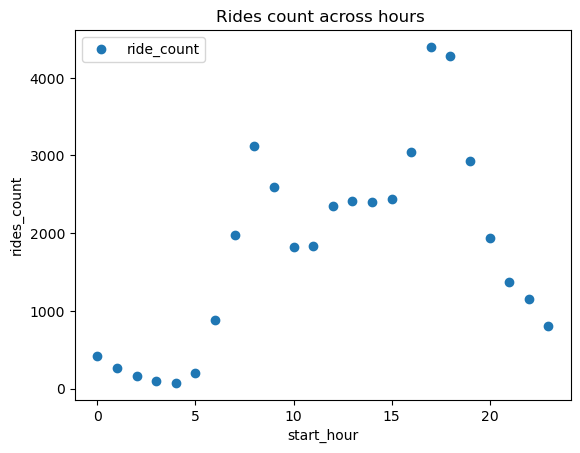

In [45]:
#plt for rides taken and hour
hourly_aggregated.plot(x = 'start_hour', y='ride_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Rides count across hours ')  
plt.xlabel('start_hour')  
plt.ylabel('rides_count')  
plt.show()

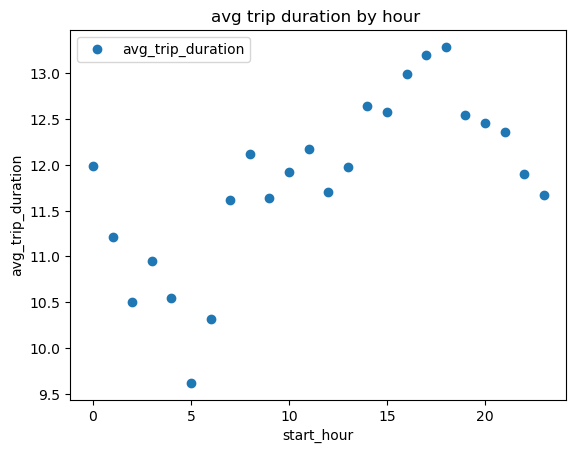

In [46]:
# plot for trip duration and by hour
hourly_aggregated.plot(x = 'start_hour', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('avg trip duration by hour ')  
plt.xlabel('start_hour')  
plt.ylabel('avg_trip_duration')  
plt.show()

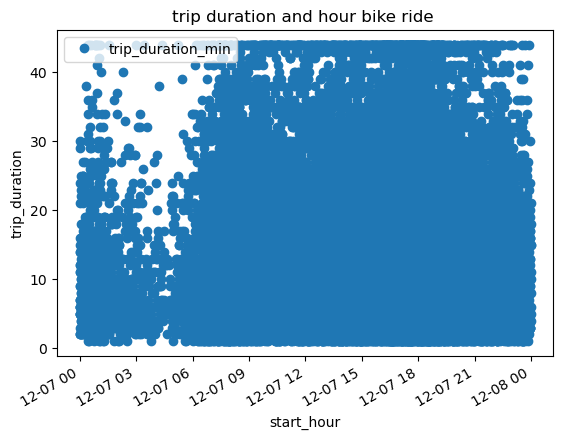

In [47]:
# plot for trip duration and hour but nt categorized
citi_1.plot(x = 'ride_start_time', y='trip_duration_min',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [48]:
# rides by hour ride count and avg trip duration
hourly_aggregated = citi_1.groupby('start_hour').agg({
    'ride_start_date': 'count',          # Count of rides
    'trip_duration_min': 'mean'              # Average trip duration
}).reset_index()


In [49]:
hourly_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   start_hour         24 non-null     int64  
 1   ride_start_date    24 non-null     int64  
 2   trip_duration_min  24 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 708.0 bytes


In [50]:
# making columns 
hourly_aggregated.rename(columns={'ride_start_date': 'ride_count', 'trip_duration_min': 'avg_trip_duration'}, inplace=True)

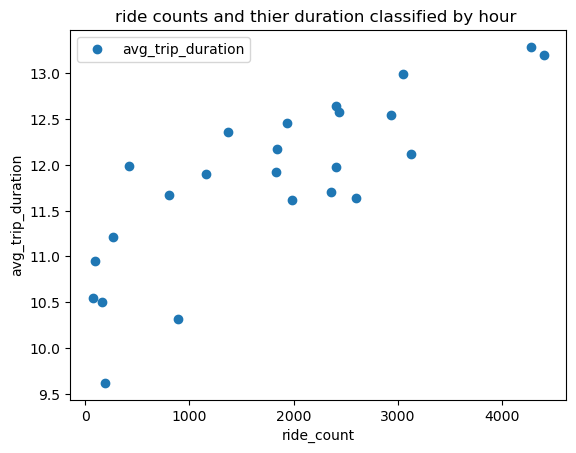

In [51]:
#plot for avg trip duration and ride count
hourly_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

###  During busier hours rides occur more often, but not longlasting.

In [73]:
# day of week and ride count
day_counts = citi_1.groupby('day_of_week')['ride_start_date'].count().reset_index()

In [74]:
day_counts

,day_of_week,ride_start_date
0,Fri,6594
1,Mon,6797
2,Sat,4964
3,Sun,5505
4,Thu,6212
5,Tue,6429
6,Wed,6489


In [76]:
# day of week ride count and avg trip duration
daily_aggregated = citi_1.groupby('day_of_week').agg({
    'ride_start_date': 'count',          # Count of rides
    'trip_duration_min': 'mean'              # Average trip duration
}).reset_index()


In [77]:
daily_aggregated

,day_of_week,ride_start_date,trip_duration_min
0,Fri,6594,12.232939
1,Mon,6797,12.200824
2,Sat,4964,12.904110
3,Sun,5505,13.065213
4,Thu,6212,12.023825
5,Tue,6429,12.001089
6,Wed,6489,12.227308


In [78]:
#changing column names
daily_aggregated.rename(columns={'ride_start_date': 'ride_count', 'trip_duration_min': 'avg_trip_duration'}, inplace=True)

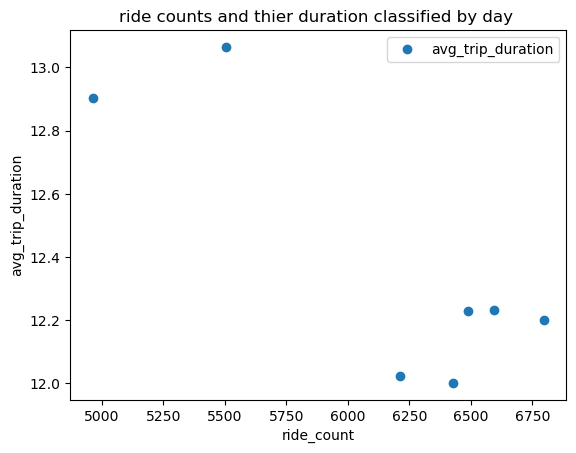

In [79]:
# ride counts and avg trip duration by day
daily_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by day ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

###  Less riders occurs on the weekend but it is little bit longer.

## Extrim values check

<Axes: xlabel='trip_duration_min', ylabel='Density'>

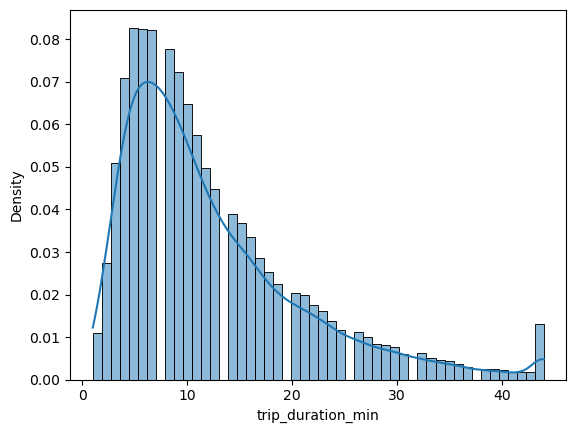

In [20]:
# Histigramm to see outliers
sns.histplot(citi_1["trip_duration_min"], kde=True, stat="density", bins=50)

In [53]:
# Using iqr method to look for outliers

In [54]:
q1=hourly_aggregated['ride_count'].quantile(0.25)#first Quartile
q3=hourly_aggregated['ride_count'].quantile(0.75)#third Quartile
iqr = q3-q1

In [55]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [56]:
outliers = hourly_aggregated[(hourly_aggregated['ride_count'] < lower_bound) | (hourly_aggregated['ride_count'] > upper_bound)]

In [57]:
# No outliers
outliers

,start_hour,ride_count,avg_trip_duration


In [58]:
q1=hourly_aggregated['avg_trip_duration'].quantile(0.25)#first Quartile
q3=hourly_aggregated['avg_trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [59]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [60]:
outliers_1 = hourly_aggregated[(hourly_aggregated['avg_trip_duration'] < lower_bound) | (hourly_aggregated['avg_trip_duration'] > upper_bound)]

In [62]:
# Outliers
outliers_1

,start_hour,ride_count,avg_trip_duration
5,5,195,9.620513


In [63]:
#finding outliers in the main dateset
q1=citi_1["trip_duration_min"].quantile(0.25)#first Quartile
q3=citi_1['trip_duration_min'].quantile(0.75)#third Quartile
iqr = q3-q1

In [64]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [65]:
outliers_2 = citi_1[(citi_1['trip_duration_min'] < lower_bound) | (citi_1['trip_duration_min'] > upper_bound)]

In [66]:
outliers_2

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration_min,birth_year,ride_start,ride_end,Trip category,ride_start_date,ride_start_time,Birth category
27,Thu,16,471,Grand St & Havemeyer St,40.712868,-73.956981,388,W 26 St & 10 Ave,40.749718,-74.002950,34,1954,2013-09-19 16:35:00,2013-09-19 17:09:00,over 20 minutes,2013-09-19,2023-12-07 16:35:00,51-70
55,Wed,17,469,Broadway & W 53 St,40.763441,-73.982681,313,Washington Ave & Park Ave,40.696102,-73.967510,37,1979,2013-09-11 17:11:00,2013-09-11 17:49:00,over 20 minutes,2013-09-11,2023-12-07 17:11:00,31-50
179,Mon,14,342,Columbia St & Rivington St,40.717400,-73.980166,342,Columbia St & Rivington St,40.717400,-73.980166,34,1960,2013-09-09 14:38:00,2013-09-09 15:13:00,over 20 minutes,2013-09-09,2023-12-07 14:38:00,51-70
183,Tue,10,391,Clark St & Henry St,40.697601,-73.993446,486,Broadway & W 29 St,40.746201,-73.988557,35,1957,2013-09-24 10:32:00,2013-09-24 11:08:00,over 20 minutes,2013-09-24,2023-12-07 10:32:00,51-70
197,Thu,17,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,37,1963,2013-09-05 17:31:00,2013-09-05 18:09:00,over 20 minutes,2013-09-05,2023-12-07 17:31:00,51-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42834,Sun,18,448,W 37 St & 10 Ave,40.756604,-73.997901,514,12 Ave & W 40 St,40.760875,-74.002777,44,1990,2013-09-08 18:32:00,2013-09-08 19:22:00,over 20 minutes,2013-09-08,2023-12-07 18:32:00,18-30
42899,Tue,7,278,Concord St & Bridge St,40.697666,-73.984764,352,W 56 St & 6 Ave,40.763406,-73.977225,37,1976,2013-09-10 07:47:00,2013-09-10 08:24:00,over 20 minutes,2013-09-10,2023-12-07 07:47:00,31-50
42900,Sun,16,242,Flushing Ave & Carlton Ave,40.697883,-73.973503,526,E 33 St & 5 Ave,40.747659,-73.984907,44,1965,2013-09-22 16:10:00,2013-09-22 17:25:00,over 20 minutes,2013-09-22,2023-12-07 16:10:00,31-50
42906,Mon,16,493,W 45 St & 6 Ave,40.756800,-73.982912,501,FDR Drive & E 35 St,40.744219,-73.971212,44,1968,2013-09-09 16:13:00,2013-09-09 17:13:00,over 20 minutes,2013-09-09,2023-12-07 16:13:00,31-50


In [67]:
outliers_2.shape

(1931, 18)

In [68]:
citi_1.shape

(42990, 18)

In [71]:
#removing outliers
citi_out = citi_1[(citi_1['trip_duration_min'] >= lower_bound) & (citi_1['trip_duration_min'] <= upper_bound)]

In [72]:
citi_out.shape

(41059, 18)

# Hypotesis: As more bike rides occurs in an hour, longer will be trip duration.


In [80]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = hourly_aggregated['ride_count'].values.reshape(-1,1)
y = hourly_aggregated['avg_trip_duration'].values.reshape(-1,1)

In [81]:
X

array([[ 420],
       [ 266],
       [ 162],
       [  96],
       [  75],
       [ 195],
       [ 889],
       [1980],
       [3127],
       [2598],
       [1826],
       [1841],
       [2353],
       [2408],
       [2401],
       [2436],
       [3046],
       [4398],
       [4278],
       [2930],
       [1932],
       [1371],
       [1159],
       [ 803]], dtype=int64)

In [82]:
y

array([[11.98333333],
       [11.21804511],
       [10.5       ],
       [10.94791667],
       [10.54666667],
       [ 9.62051282],
       [10.31608549],
       [11.61767677],
       [12.11832427],
       [11.64203233],
       [11.92168675],
       [12.17436176],
       [11.70208245],
       [11.98006645],
       [12.64098292],
       [12.57758621],
       [12.99507551],
       [13.2053206 ],
       [13.29055633],
       [12.54846416],
       [12.45341615],
       [12.36032093],
       [11.90250216],
       [11.67247821]])

In [83]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [84]:
# Create a regression object.

regression = LinearRegression() 

In [85]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [86]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

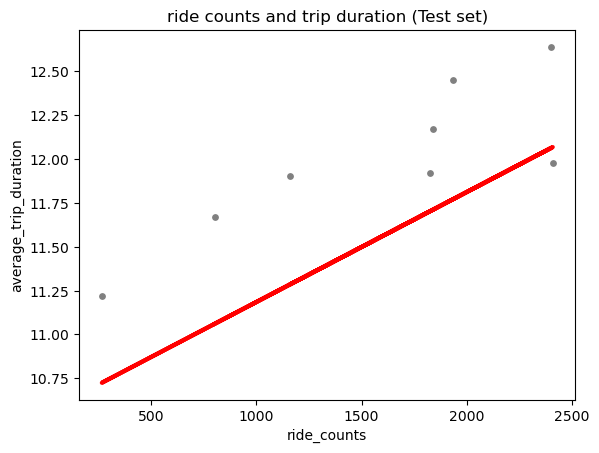

In [87]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('ride counts and trip duration (Test set)')
plot_test.xlabel('ride_counts')
plot_test.ylabel('average_trip_duration')
plot_test.show()

### Regression line is positive, so as more rides occurs than it is longer than average. But regression line is not that close to the plots.

In [88]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [89]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0006276]]
Mean squared error:  0.2581938832592045
R2 score:  -0.49521452688508805


In [90]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,12.174362,11.713023
1,11.921687,11.703609
2,11.902502,11.285001
3,12.640983,12.064479
4,12.453416,11.770135
5,11.218045,10.724555
6,11.980066,12.068872
7,11.672478,11.061576


### The model did not perform well on test set because actual and predicted data is far.  Beside that another indicator as the MSE score is high so this model can’t accurately predict the influence of average trip duration and frequency of rides count.  R2 score -0.49

### Possible bias could be rides were too long/ to short/broken timer on bike etc. 

In [91]:
# saving to csv
citi_1.to_csv(os.path.join(path, '02 Data','prepared data', 'c_5.csv'))

# Performance improvement after removing outliers

In [92]:
# running the regression again with a filtered DF
hourly_aggregated_filtered = filtered_citi.groupby('start_hour').agg({
    'ride_start_date': 'count',          # Count of rides
    'trip_duration_min': 'mean'              # Average trip duration
}).reset_index()


In [93]:
hourly_aggregated_filtered

,start_hour,ride_start_date,trip_duration_min
0,0,403,10.813896
1,1,257,10.295720
2,2,158,9.854430
3,3,90,9.255556
4,4,73,9.712329
5,5,192,9.161458
6,6,863,9.492468
7,7,1909,10.653745
8,8,3025,11.278017
9,9,2507,10.675309


In [94]:
#rename columns
hourly_aggregated_filtered.rename(columns={'ride_start_date': 'ride_count', 'trip_duration_min': 'avg_trip_duration'}, inplace=True)

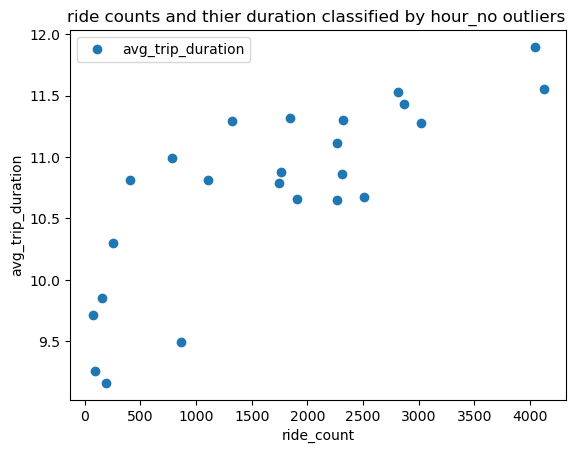

In [95]:
#plot with DF set with no outliers
hourly_aggregated_filtered.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

In [96]:
#reshaping values
X_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['avg_trip_duration'].values.reshape(-1,1)

In [97]:
# Split data into a training set and a test set.

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [98]:
# Create a regression object.

regression = LinearRegression() 

In [99]:
# Fit the regression object onto the training set.

regression.fit(X_1_train, y_1_train)

LinearRegression()

In [100]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

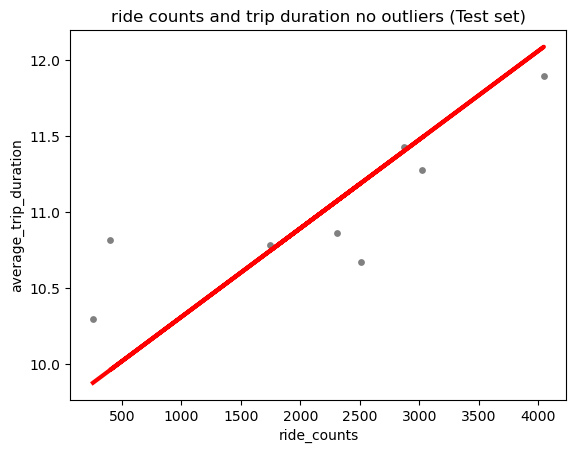

In [101]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('ride_counts')
plot_test_1.ylabel('average_trip_duration')
plot_test_1.show()

###  Positive regression, but regression line is close to the plots.

In [102]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [103]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00058323]]
Mean squared error:  0.1617229322111531
R2 score:  0.26757230626557915


In [104]:
# Create a dataframe comparing the actual and predicted values of y.

data_1 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,12.174362,11.713023
1,11.921687,11.703609
2,11.902502,11.285001
3,12.640983,12.064479
4,12.453416,11.770135
5,11.218045,10.724555
6,11.980066,12.068872
7,11.672478,11.061576


### Performance is slightly better, because difference between actul and predicted is a few seconds. MSE is lower and R2 is 0.2, which means still model is not fit right.